<h1>Problem Statement</h1>
<p>The problem involves using classification techniques to predict the chance of admission to a graduate program in India. The given features represent crucial aspects that universities typically consider while evaluating applications. The goal is to build a predictive model that can assess the relationship between these features and the likelihood of admission to help applicants understand their chances and make informed decisions in their pursuit of higher education.</p>

<h2>Features and their relevance in the context of graduate admissions in India</h2>
<ol>
    <li>
        <strong>GRE Score:</strong> The Graduate Record Examination (GRE) is a standardized test commonly required for admission to graduate programs, especially in the United States and other countries. It assesses a candidate's verbal reasoning, quantitative reasoning, and analytical writing skills. A higher GRE score is generally considered favorable as it demonstrates strong academic potential and analytical abilities.
    </li>
    <li>
        <strong>TOEFL Score:</strong> The Test of English as a Foreign Language (TOEFL) measures the English language proficiency of non-native English speakers. Many universities in English-speaking countries, including the US, Canada, and Australia, require international students, including Indians, to submit TOEFL scores as part of their application. A higher TOEFL score indicates better English language proficiency, which is crucial for success in graduate studies conducted in English.
    </li>
    <li>
        <strong>University Rating:</strong> This feature likely refers to the ranking or reputation of the university from which the candidate completed their undergraduate studies. In India, universities and colleges are often ranked based on various criteria, including academic reputation, research output, faculty quality, and infrastructure. Graduating from a highly reputed university can positively influence the chances of admission to competitive graduate programs.
    </li>
    <li>
        <strong>Statement of Purpose (SOP):</strong> The SOP is a critical component of a graduate application. It is a written essay where the applicant explains their academic and career goals, research interests, and reasons for applying to a specific program. A well-crafted SOP can highlight the candidate's passion, commitment, and alignment with the program, enhancing their chance of admission.
    </li>
    <li>
        <strong>Letters of Recommendation (LOR):</strong> LORs are written by professors, supervisors, or professionals who know the applicant well. They provide insights into the candidate's academic abilities, research potential, work ethic, and personal qualities. Strong and positive LORs can significantly boost the applicant's chances of being admitted.
    </li>
    <li>
        <strong>CGPA (Cumulative Grade Point Average):</strong> CGPA represents the overall academic performance of the candidate during their undergraduate studies. A higher CGPA indicates consistent academic excellence, which is often viewed favorably by universities during the selection process.
    </li>
    <li>
        <strong>Research Experience:</strong> This feature likely indicates whether the applicant has prior research experience, such as participating in research projects, publications, or internships. Research experience can demonstrate a candidate's interest in academic pursuits and their potential to contribute to the university's research community.
    </li>
</ol>


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Step 1: Data Cleaning and Preprocessing

In [64]:
# Load the dataset
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

# Check for missing values
print(data.isnull().sum())
data.head()
data.info()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


<!DOCTYPE html>
<html>
<head>
  <title>Data Preprocessing Summary</title>
</head>
<body>
  <h1>Data Preprocessing Summary</h1>
  <p>
    When working with the dataset for the machine learning project, the following data preprocessing steps were performed:
  </p>
  <ol>
    <li>
      <strong>Column Naming Best Practices:</strong> To ensure consistency and compatibility with machine learning tools, spaces at the start and end of column names were removed. Additionally, column names were converted to lowercase and underscores were used as separators to follow best practices for column naming.
    </li>
    <li>
      <strong>Removal of Redundant Data:</strong> The "Serial No." column was identified as an identifier and did not provide any relevant information for the prediction task. Therefore, it was safely dropped from the dataset. This step was taken to improve the model's performance and prevent it from learning spurious relationships based on the serial numbers.
    </li>
  </ol>
</body>
</html>


In [65]:
# Drop the "Serial No." column
data.drop(columns=['Serial No.'], inplace=True)

# Remove spaces at the start and end of column names
data.columns = data.columns.str.strip()

# Rename columns to follow best practices (using underscores and lowercase)
data.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

# Print the updated column names
print("Updated Column Names:")
print(data.columns)

Updated Column Names:
Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor', 'cgpa',
       'research', 'chance_of_admit'],
      dtype='object')


In [66]:
# Check for duplicate rows based on all columns except "Serial No."
duplicate_rows = data[data.duplicated(subset=data.columns[1:])]

# Print the duplicate rows (if any)
print("Duplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
Empty DataFrame
Columns: [gre_score, toefl_score, university_rating, sop, lor, cgpa, research, chance_of_admit]
Index: []


<!DOCTYPE html>
<html>
<body>
  <h1>Insights</h1>
  <p>
    The provided dataset contains 500 entries (rows) and 9 columns, including features such as GRE Score, TOEFL Score, University Rating, SOP (Statement of Purpose) score, LOR (Letters of Recommendation) score, CGPA (Cumulative Grade Point Average), Research experience, and the target variable "Chance of Admit."
  </p>

  <p>
    There are no missing values in the dataset, as indicated by the output of <code>data.isnull().sum()</code>.
  </p>

  <p>
    The features are of different data types:
    <ul>
      <li>GRE Score, TOEFL Score, University Rating, and Research are represented as integers (int64).</li>
      <li>SOP, LOR, CGPA, and Chance of Admit are represented as floating-point numbers (float64).</li>
    </ul>
  </p>

  <p>
    The dataset is well-cleaned and ready for further analysis and modeling.
  </p>
  </ol>
</body>
</html>


Step 2: Exploratory Data Analysis (EDA)

In [67]:
X = data.drop(columns=['chance_of_admit'])
y = data['chance_of_admit']
# Summary statistics
data.describe()



,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<!DOCTYPE html>
<html>
<body>
  <h1>Insights from Descriptive Analysis</h1>
  <ul>
    <li>
      <strong>The columns "GRE Score," "TOEFL Score," "CGPA" exhibit approximately equal mean and median values, suggesting a near-normal distributed data.</strong>
    </li>
    <li>
      <strong>The quartile values, along with the max and min values, show that there are no significant outliers in these columns, indicating a consistent distribution without extreme data points.</strong>
    </li>
    <li>
      <strong>Visualizations using box plots, violin plots, and histograms were used to further confirm the distribution and presence of outliers in the data.</strong>
    </li>
    <li>
      <strong>The GRE and TOEFL Scores seem to have a considerable range, indicating that applicants with varying levels of academic abilities are present in the dataset.</strong>
    </li>
    <li>
      <strong>The University Rating, SOP, and LOR scores show that there is some variation in the quality of applicants' statements and recommendations also they are categorials that are already encoded.</strong>
    </li>
    <li>
      <strong>The CGPA's average value is relatively high, suggesting that most applicants have a good academic track record.</strong>
    </li>
    <li>
      <strong>The majority of applicants in the dataset have research experience (Research feature value of 1 - 280 out of 500).</strong>
    </li>
    <li>
      <strong>The target variable "Chance of Admit" has a decent spread, suggesting that the dataset includes a diverse set of applicants with varying chances of admission.</strong>
    </li>



  </ul>
</body>
</html>


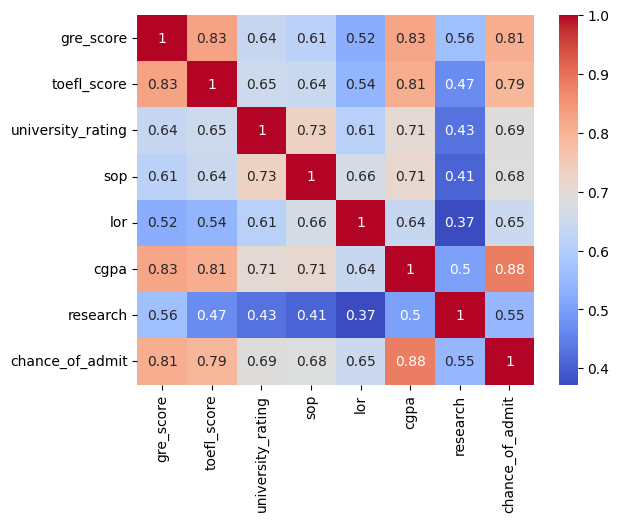

In [68]:
# Pairwise correlation heatmap
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()



<!DOCTYPE html>
<html>
<body>
  <h1>Insights from Correlation Matrix</h1>
  <p>The correlation matrix provides valuable insights into the relationships between the features and the target variable. It suggests that the following factors are important in affecting the chance of admission:</p>
  <ul>
    <li>The "GRE Score" and "TOEFL Score" have a high positive correlation of approximately 0.83, suggesting that applicants with higher GRE scores tend to have higher TOEFL scores.</li>
    <li>The "GRE Score" and "CGPA" also show a strong positive correlation of around 0.83, indicating that applicants with higher GRE scores tend to have higher CGPA scores.</li>
    <li>Similarly, the "TOEFL Score" and "CGPA" exhibit a strong positive correlation of about 0.81, indicating that applicants with higher TOEFL scores tend to have higher CGPA scores.</li>
    <li>The "GRE Score," "TOEFL Score," and "Chance of Admit" are positively correlated with the target variable "Chance of Admit," with correlation coefficients of approximately 0.81 and 0.79, respectively. This indicates that higher GRE and TOEFL scores are associated with a higher chance of admission.This also suggests multicollinearity exists between the features</li>
    <li>The "CGPA" shows the highest positive correlation with the "Chance of Admit," with a coefficient of around 0.88, indicating that applicants with higher CGPA scores have a significantly higher chance of admission.</li>
    <li>The "University Rating," "SOP," and "LOR" also exhibit positive correlations with the "Chance of Admit," though relatively lower than the correlations with test scores and CGPA. This suggests that the quality of the university, statement of purpose, and letters of recommendation also play a role in determining the chances of admission.</li>
  </ul>
</body>
</html>


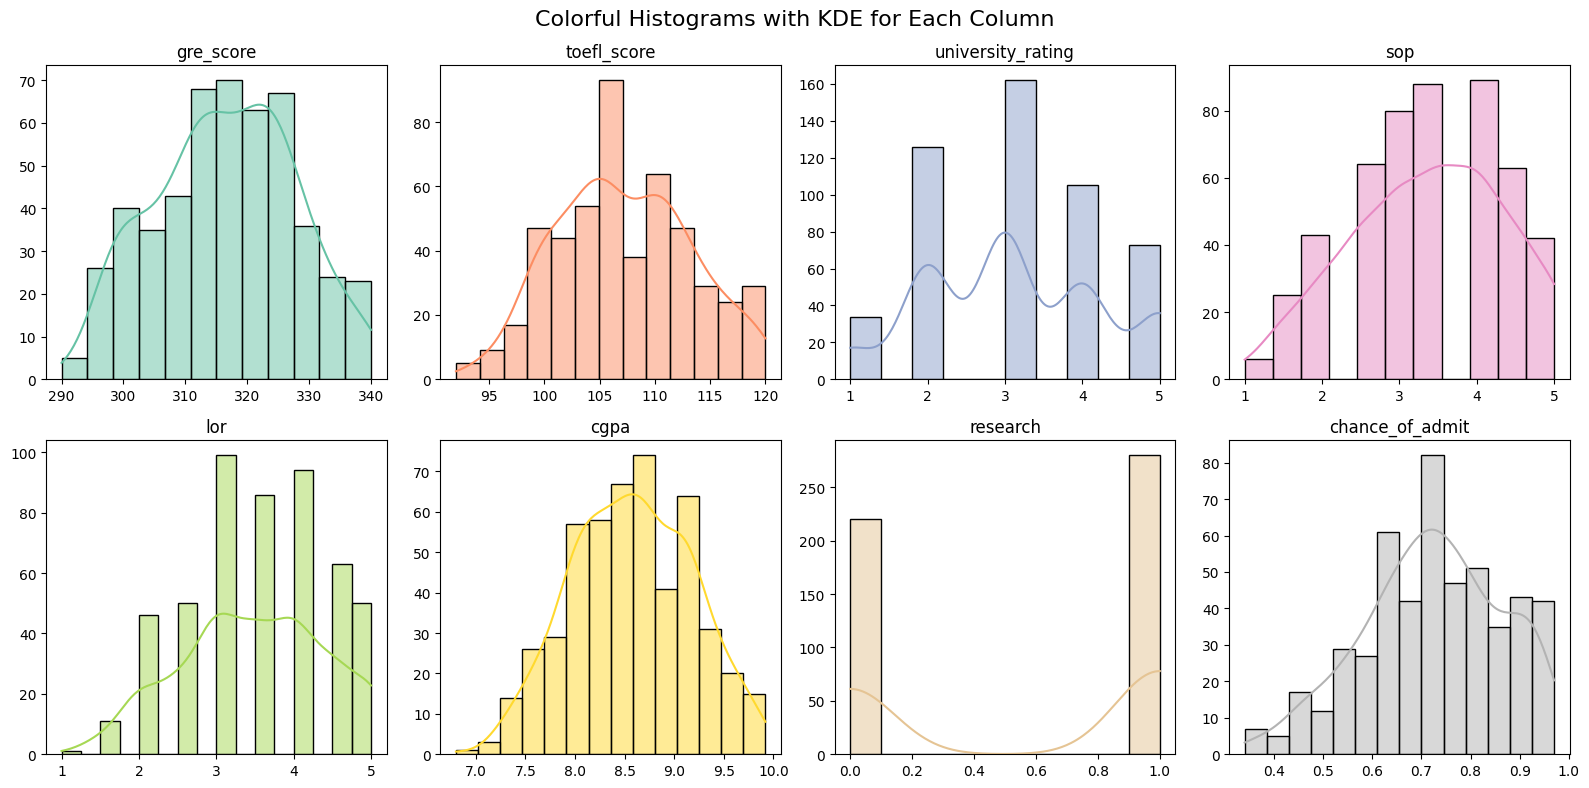

In [69]:
# Define a colorful palette
colors = sns.color_palette('Set2')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Colorful Histograms with KDE for Each Column', fontsize=16)

# Plot histograms with KDE for each column using colorful palette
for i, col in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    sns.histplot(data[col], kde=True, ax=axes[row_idx, col_idx], color=colors[i % len(colors)], edgecolor='black')
    axes[row_idx, col_idx].set_title(col)
    axes[row_idx, col_idx].set_xlabel('')
    axes[row_idx, col_idx].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


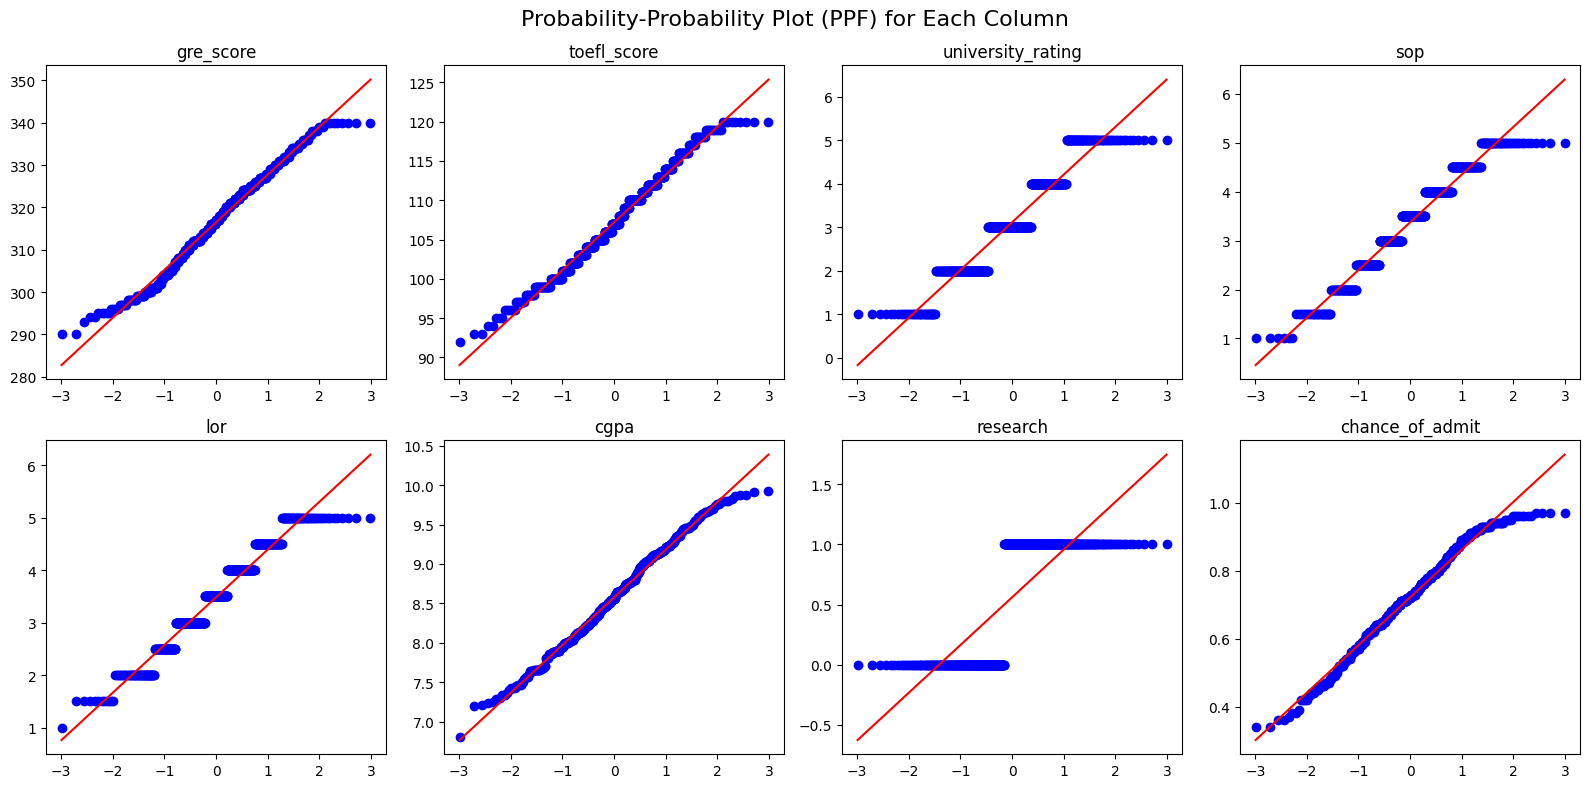

In [70]:

import scipy.stats as stats

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle('Probability-Probability Plot (PPF) for Each Column', fontsize=16)

# Generate PPF for each column
for i, col in enumerate(data.columns):
    row_idx = i // 4
    col_idx = i % 4
    stats.probplot(data[col], plot=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
    axes[row_idx, col_idx].set_xlabel('')
    axes[row_idx, col_idx].set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


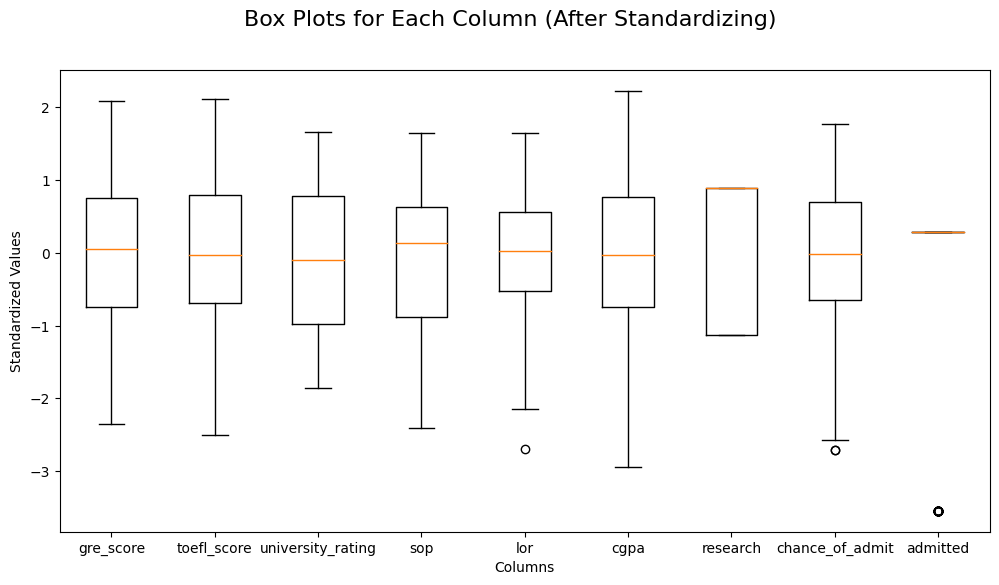

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is the DataFrame containing the dataset
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Convert the standardized data back to a DataFrame
data_standardized = pd.DataFrame(data_standardized, columns=data.columns)

# Create subplots
fig, axes = plt.subplots(figsize=(12, 6))
fig.suptitle('Box Plots for Each Column (After Standardizing)', fontsize=16)

# Generate box plots for each column
box_data = [data_standardized[col] for col in data_standardized.columns]
labels = data_standardized.columns

# Create the box plot
axes.boxplot(box_data, labels=labels)

# Set x-axis label
axes.set_xlabel('Columns')

# Set y-axis label
axes.set_ylabel('Standardized Values')

# Show the plot
plt.show()



In [72]:
data.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


 <body>
  <h1>Visualization insights</h1>
  <p>
  <ul>    
    <li>both the "GRE Score," "TOEFL Score," and "CGPA" follow a normal distribution, as confirmed by histogram and Q-Q plot analysis.</li>
    <li>The majority of applicants in the dataset have applied for  experience (Research feature value of 1).</li>
    <li>The majority of applicants in the dataset have applied for  universities with rating 3.</li>
    <li>The "Chance of Admit" has a decent spread, indicating that the dataset includes a diverse set of applicants with varying chances of admission.</li>
    <li>The "University Rating," "SOP," and "LOR" are categorical columns and do not have a normal distribution. These columns represent ratings and scores assigned by universities and evaluators, respectively.</li>
    <li>there is an outlier in lor as per the box plot but before treating it we will check if hampers our model. </li>
  </ul>
  </p>
  </body>

Step 3: Feature Importance Analysis

In [73]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature importance using SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support(indices=True)].tolist()

# Print selected feature names
print("Selected features:", selected_features)

Selected features: ['gre_score', 'toefl_score', 'university_rating', 'sop', 'cgpa']


In [74]:

from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_regressor.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_regressor.feature_importances_})

# Sort the features by importance in decreasing order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


             Feature  Importance
5               cgpa    0.796080
0          gre_score    0.088306
1        toefl_score    0.037664
3                sop    0.028443
4                lor    0.024091
2  university_rating    0.014612
6           research    0.010803


<!DOCTYPE html>
<html>
<head>
  <title>Threshold for Binary Classification</title>
</head>
<body>
  <h1>Threshold for Binary Classification</h1>
  <p>The threshold for determining whether an applicant is admitted or not depends on the specific application and context in which the model is used. In binary classification problems like this one, it is common to use a threshold of 0.5.</p>
  <p>With a threshold of 0.5:</p>
  <ul>
    <li>If the predicted probability of admission is greater than or equal to 0.5, the applicant is classified as "Admitted" (positive class).</li>
    <li>If the predicted probability is less than 0.5, the applicant is classified as "Not Admitted" (negative class).</li>
  </ul>
  <p>However, the choice of threshold is not fixed and can be adjusted based on the specific needs of the application:</p>
  <ul>
    <li>If the cost of false positives (incorrectly predicting an applicant will be admitted when they won't) is high, you might want to increase the threshold to reduce false positives.</li>
    <li>If the cost of false negatives (incorrectly predicting an applicant will not be admitted when they will) is high, you might want to decrease the threshold to reduce false negatives.</li>
  </ul>
  <p>Ultimately, the selection of the threshold should be determined based on domain knowledge, the goals of the application, and the trade-offs between different prediction outcomes.</p>
</body>
</html>

In [75]:
# Create a new column 'admitted' based on the 'chance_of_admit' column
data['admitted'] = data['chance_of_admit'].apply(lambda x: 1 if x >= 0.5 else 0)

# Print the updated DataFrame
data


,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit,admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,1


In [76]:


# Create a new DataFrame without the 'chance_of_admit' column
df_without_chance_of_admit = data.drop(columns=['chance_of_admit'])
df_without_chance_of_admit

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,1


Step 4: Model Selection and Evaluation

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have the dataframe 'df_without_chance_of_admit' with features and target variable
# Split the data into features (X) and target variable (y)
X = df_without_chance_of_admit.drop(columns=['admitted'])  # Drop the 'admitted' column to get features (X)
y = df_without_chance_of_admit['admitted']  # Target variable (y) is the 'admitted' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to store the models and their predictions
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
}

# Dictionary to store the predictions
predictions = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # Get the predictions for the test set
    predictions[model_name] = y_pred  # Store the predictions in the dictionary

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} - Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")
    print("\n")


Random Forest - Evaluation Metrics:
Accuracy: 0.94
Precision: 0.95
Recall: 0.99
F1 Score: 0.97
ROC-AUC Score: 0.72


Support Vector Machine - Evaluation Metrics:
Accuracy: 0.91
Precision: 0.91
Recall: 1.00
F1 Score: 0.95
ROC-AUC Score: 0.50


Gradient Boosting - Evaluation Metrics:
Accuracy: 0.95
Precision: 0.95
Recall: 1.00
F1 Score: 0.97
ROC-AUC Score: 0.72


AdaBoost - Evaluation Metrics:
Accuracy: 0.92
Precision: 0.94
Recall: 0.98
F1 Score: 0.96
ROC-AUC Score: 0.66


XGBoost - Evaluation Metrics:
Accuracy: 0.95
Precision: 0.96
Recall: 0.99
F1 Score: 0.97
ROC-AUC Score: 0.77




<!DOCTYPE html>
<html>
<head>
  <title>Model Evaluation Summary</title>
</head>
<body>
  <h1>Model Evaluation Summary</h1>
  <p>Based on the evaluation metrics, the "XGBoost" model outperforms the other models in terms of Accuracy, Precision, Recall, F1 Score, and ROC-AUC Score. It achieves the highest values for most of the evaluation metrics, indicating superior performance compared to the other models.</p>
  <p>The "XGBoost" model demonstrates a good balance between correctly identifying positive cases (high recall) and correctly distinguishing between positive and negative cases (high precision). This is important for making accurate predictions in a binary classification problem like this.</p>
  <p>Moreover, the "XGBoost" model achieves a high F1 Score, which considers both precision and recall. A high F1 Score is desirable, especially for a balanced dataset, as it shows the model's ability to maintain a balance between precision and recall.</p>
  <p>Furthermore, the "XGBoost" model has the highest ROC-AUC Score, which measures the model's ability to discriminate between positive and negative cases. A higher ROC-AUC score indicates better performance in distinguishing between the two classes, making it a reliable metric for evaluating the model's overall performance.</p>
</body>
</html>

In [78]:
# hyperparameter tuning

# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the XGBoost model
# xgb_model = XGBClassifier(random_state=42)

# # Define the hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
# }

# # Perform GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Train the XGBoost model with the best hyperparameters
# best_xgb_model = XGBClassifier(random_state=42, **best_params)
# best_xgb_model.fit(X_train, y_train)

# # Get the predictions on the test set
# y_pred = best_xgb_model.predict(X_test)

# # Evaluate the model performance
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# roc_auc = roc_auc_score(y_test, y_pred)

# print("XGBoost - Evaluation Metrics:")
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print(f"ROC-AUC Score: {roc_auc:.2f}")


In [79]:

from sklearn.model_selection import train_test_split, KFold


# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Initialize KFold with 5 folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Perform k-fold cross-validation
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fit the XGBoost model on the training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = xgb_model.predict(X_test)

    # Calculate evaluation metrics for the fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Append the metrics to the corresponding lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Calculate the mean and standard deviation of evaluation metrics across all folds
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

mean_precision = sum(precision_scores) / len(precision_scores)
std_precision = np.std(precision_scores)

mean_recall = sum(recall_scores) / len(recall_scores)
std_recall = np.std(recall_scores)

mean_f1 = sum(f1_scores) / len(f1_scores)
std_f1 = np.std(f1_scores)

mean_roc_auc = sum(roc_auc_scores) / len(roc_auc_scores)
std_roc_auc = np.std(roc_auc_scores)

# Print the mean and standard deviation of evaluation metrics
print("Mean Accuracy:", mean_accuracy, "+/-", std_accuracy)
print("Mean Precision:", mean_precision, "+/-", std_precision)
print("Mean Recall:", mean_recall, "+/-", std_recall)
print("Mean F1 Score:", mean_f1, "+/-", std_f1)
print("Mean ROC-AUC Score:", mean_roc_auc, "+/-", std_roc_auc)


Mean Accuracy: 0.9359999999999999 +/- 0.018547236990991374
Mean Precision: 0.9593952782493484 +/- 0.008509014864876851
Mean Recall: 0.9718920323175644 +/- 0.017555507494384386
Mean F1 Score: 0.965521376886271 +/- 0.010482394686148701
Mean ROC-AUC Score: 0.724834905047671 +/- 0.03844543098037776


<!DOCTYPE html>
<html>
<head>
  <title>Model Evaluation Metrics - XGBoost</title>
</head>
<body>
  <h1>Model Evaluation Metrics - XGBoost</h1>
  <p>Results from k-fold cross-validation on the XGBoost model:</p>
  <table border="1" style="border-collapse: collapse;">
    <tr>
      <th>Evaluation Metric</th>
      <th>Mean Value</th>
      <th>Standard Deviation</th>
    </tr>
    <tr>
      <td>Accuracy</td>
      <td>0.936</td>
      <td>0.0185</td>
    </tr>
    <tr>
      <td>Precision</td>
      <td>0.959</td>
      <td>0.00851</td>
    </tr>
    <tr>
      <td>Recall</td>
      <td>0.972</td>
      <td>0.0176</td>
    </tr>
    <tr>
      <td>F1 Score</td>
      <td>0.966</td>
      <td>0.0105</td>
    </tr>
    <tr>
      <td>ROC-AUC Score</td>
      <td>0.725</td>
      <td>0.0384</td>
    </tr>
  </table>
</body>
</html>

<!DOCTYPE html>
<html>
<head>
  <title>XGBoost Model Evaluation</title>
</head>
<body>
  <p>The mean accuracy of the model across all folds is approximately 0.936, indicating that on average, the model correctly predicts the target variable (admitted or not) for around 93.6% of the samples in the test sets. The small standard deviation of 0.0185 suggests that the accuracy scores are relatively consistent across different folds.</p>
  <p>The mean precision of the model is approximately 0.959, which implies that the model correctly identifies around 95.9% of the positive (admitted) cases among all the predicted positive cases. The small standard deviation of 0.00851 indicates that the precision values are relatively stable across different folds.</p>
  <p>The mean recall of the model is approximately 0.972, indicating that the model correctly identifies around 97.2% of the actual positive (admitted) cases among all the true positive cases. The small standard deviation of 0.0176 suggests that the recall values are relatively consistent across different folds.</p>
  <p>The mean F1 score of the model is approximately 0.966, which is a harmonic mean of precision and recall. It provides a balanced measure of the model's accuracy. The small standard deviation of 0.0105 indicates that the F1 scores are relatively stable across different folds.</p>
  <p>The mean ROC-AUC score of the model is approximately 0.725, which measures the model's ability to distinguish between positive and negative cases. The small standard deviation of 0.0384 suggests that the ROC-AUC scores are somewhat consistent across different folds, but there is more variability compared to other evaluation metrics.</p>
  <p>Overall, the XGBoost model demonstrates good performance with high mean accuracy, precision, recall, and F1 score. However, the mean ROC-AUC score of 0.725 indicates that there may be some room for improvement in distinguishing between positive and negative cases. It's important to keep in mind that the standard deviations of the metrics are relatively small, indicating a consistent model performance across different folds, which is a positive sign of generalization. Nonetheless, further analysis and hyperparameter tuning could potentially improve the model's performance.</p>
</body>
</html>

Deployment

In [80]:
# pip install Flask

In [81]:
# Save the trained model: the XGBoost model using joblib:
import joblib

# Assuming 'xgb_model' is the trained XGBoost model
joblib.dump(xgb_model, 'xgboost_predictuniversitiesmodel.pkl')

['xgboost_predictuniversitiesmodel.pkl']